In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
import glob, os, sys

# load data

In [2]:
dtmp = np.load('SA_data.npz', allow_pickle=True)
df_param = pd.DataFrame(dtmp['df_param'])
df_info = pd.DataFrame(dtmp['df_info'])
params = dtmp['params']
paramnames = dtmp['paramnames'][:-3]# the last three are binding parameters
# paramnames = df_param[3].values
kge = dtmp['kge']

In [3]:
dtmp = np.load('SA_pyviscous_output.npz', allow_pickle=True)
sens_indx_first = dtmp['sens_indx_first']
sens_indx_total = dtmp['sens_indx_total']

In [4]:
# remove Basins without sensitivity analysis
indnosen = sens_indx_first[0,:]<0
print('Basins without sensitivity analysis:', len(indnosen))

kge = kge[:, ~indnosen]
sens_indx_first = sens_indx_first[:,~indnosen]
sens_indx_total = sens_indx_total[:,~indnosen]
df_info = df_info.loc[~indnosen]

Basins without sensitivity analysis: 627


In [5]:
# Basins with total sensitivity < 0
indneg = []
for i in range(sens_indx_total.shape[1]):
    indi = sens_indx_total[:,i]<0
    num = np.sum(indi)
    if num>0:
        # print(i, '--', num)
        indneg.append( [i, num] )

    # negative values to zero
    sens_indx_total[indi, i] = 0

# indneg = np.array(indneg)
# dtmp = sens_indx_total[:, indneg[:,0]]
# plt.plot(dtmp)
# plt.show()

In [6]:
paramnames[np.argsort(np.nanmean(-sens_indx_first, axis=1))]

array(['fff', 'FMAX', 'hksat_sf', 'sucsat_sf', 'medlynslope', 'watsat_sf',
       'n_melt_coef', 'e_ice', 'd_max',
       'precip_repartition_nonglc_all_rain_t', 'zsno',
       'interception_fraction', 'upplim_destruct_metamorph', 'kmax',
       'jmaxb0', 'slopebeta', 'zbedrock', 'cv',
       'liq_canopy_storage_scalar', 'om_frac_sf',
       'maximum_leaf_wetted_fraction', 'n_baseflow', 'bsw_sf',
       'baseflow_scalar', 'leafcn', 'accum_factor', 'taulnir'],
      dtype=object)

In [7]:
paramnames[np.argsort(np.nanmean(-sens_indx_total, axis=1))]

array(['fff', 'hksat_sf', 'FMAX', 'sucsat_sf', 'medlynslope', 'e_ice',
       'zsno', 'watsat_sf', 'd_max', 'interception_fraction',
       'n_melt_coef', 'precip_repartition_nonglc_all_rain_t', 'kmax',
       'slopebeta', 'jmaxb0', 'upplim_destruct_metamorph',
       'liq_canopy_storage_scalar', 'om_frac_sf', 'cv', 'baseflow_scalar',
       'leafcn', 'zbedrock', 'bsw_sf', 'accum_factor',
       'maximum_leaf_wetted_fraction', 'n_baseflow', 'taulnir'],
      dtype=object)

# Plot overall sensitivities

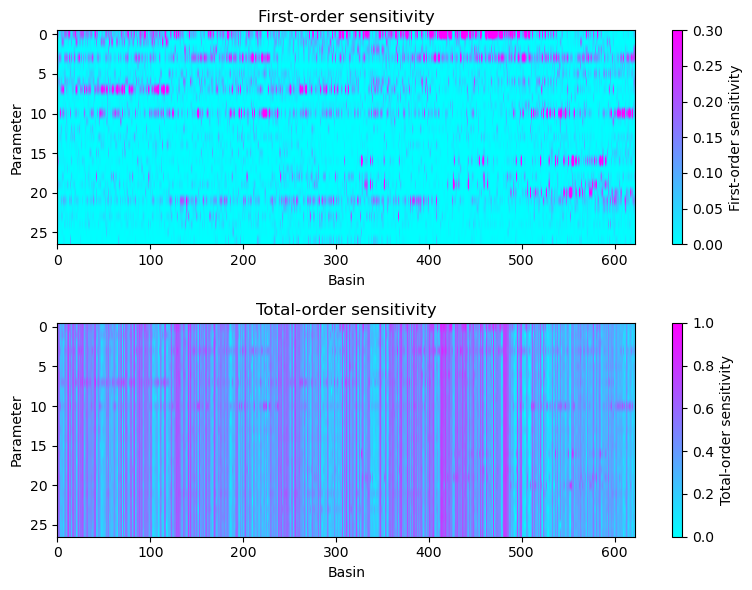

In [8]:
fig = plt.figure(figsize=[8, 6])      

ax = fig.add_subplot(2, 1, 1)
plt.imshow(sens_indx_first, aspect='auto', cmap='cool', vmin=0, vmax=0.3)
plt.xlabel('Basin')
plt.ylabel('Parameter')
plt.colorbar(label='First-order sensitivity')
plt.title('First-order sensitivity')

ax = fig.add_subplot(2, 1, 2)           
plt.imshow(sens_indx_total, aspect='auto', cmap='cool', vmin=0, vmax=1)
plt.xlabel('Basin')
plt.ylabel('Parameter')
plt.colorbar(label='Total-order sensitivity')
plt.title('Total-order sensitivity')

plt.tight_layout()
plt.show()

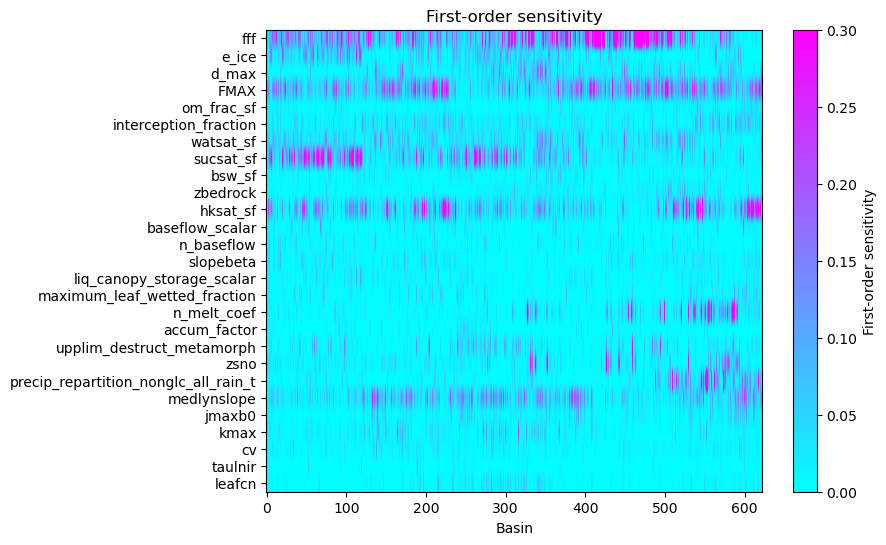

In [9]:
fig = plt.figure(figsize=[8, 6])      

plt.imshow(sens_indx_first, aspect='auto', cmap='cool', vmin=0, vmax=0.3)
plt.xlabel('Basin')
# plt.ylabel('Parameter')
plt.colorbar(label='First-order sensitivity')
plt.title('First-order sensitivity')
plt.yticks(np.arange(27), paramnames)

plt.show()

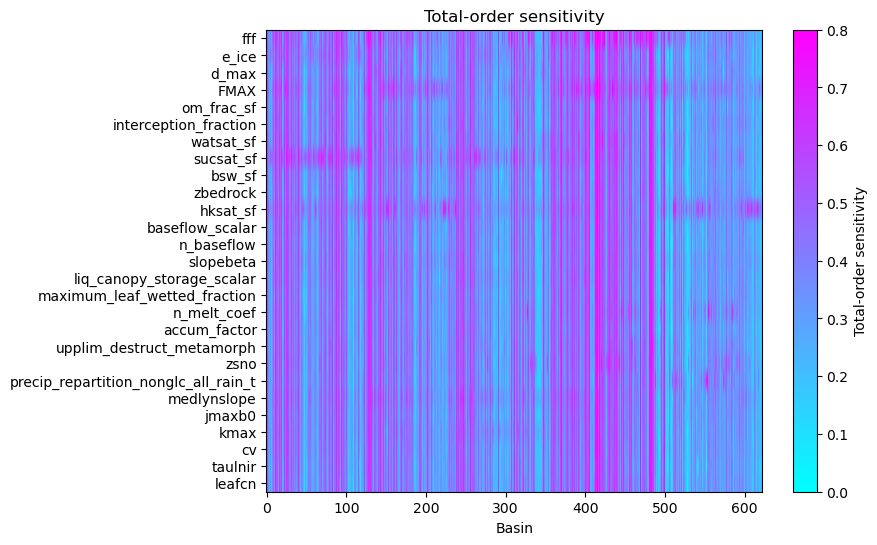

In [10]:
fig = plt.figure(figsize=[8, 6])      

plt.imshow(sens_indx_total, aspect='auto', cmap='cool', vmin=0, vmax=0.8)
plt.xlabel('Basin')
# plt.ylabel('Parameter')
plt.colorbar(label='Total-order sensitivity')
plt.title('Total-order sensitivity')
plt.yticks(np.arange(27), paramnames)

plt.show()

# Compare my results and PPE results

In [11]:
# comparing rank is more reliable
rank_ind_first = np.zeros(sens_indx_first.shape)
rank_ind_total = np.zeros(sens_indx_total.shape)
for i in range(sens_indx_first.shape[1]):
    rank_ind_first[:,i] = np.argsort(np.argsort(-sens_indx_first[:,i]))
    rank_ind_total[:,i] = np.argsort(np.argsort(-sens_indx_total[:,i]))


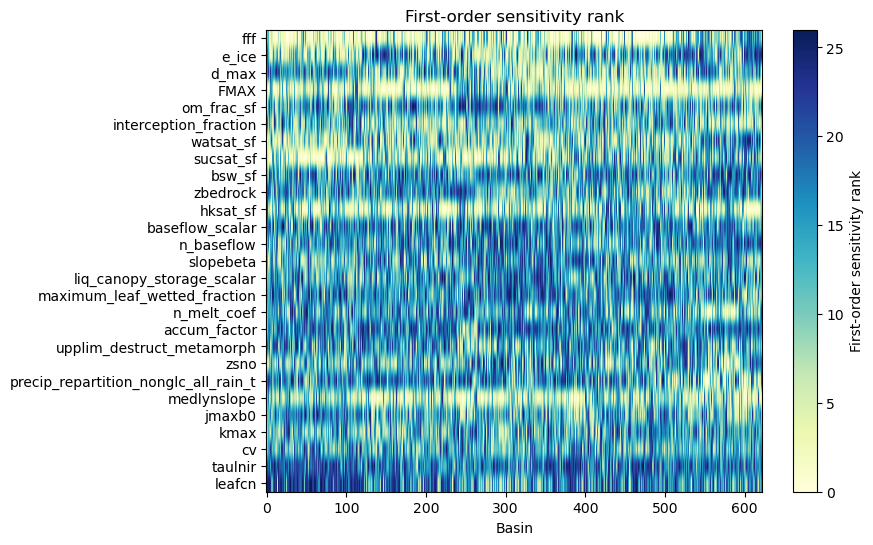

In [12]:
fig = plt.figure(figsize=[8, 6])      

plt.imshow(rank_ind_first, aspect='auto', cmap='YlGnBu')
plt.xlabel('Basin')
# plt.ylabel('Parameter')
plt.colorbar(label='First-order sensitivity rank')
plt.title('First-order sensitivity rank')
plt.yticks(np.arange(27), paramnames)

plt.show()

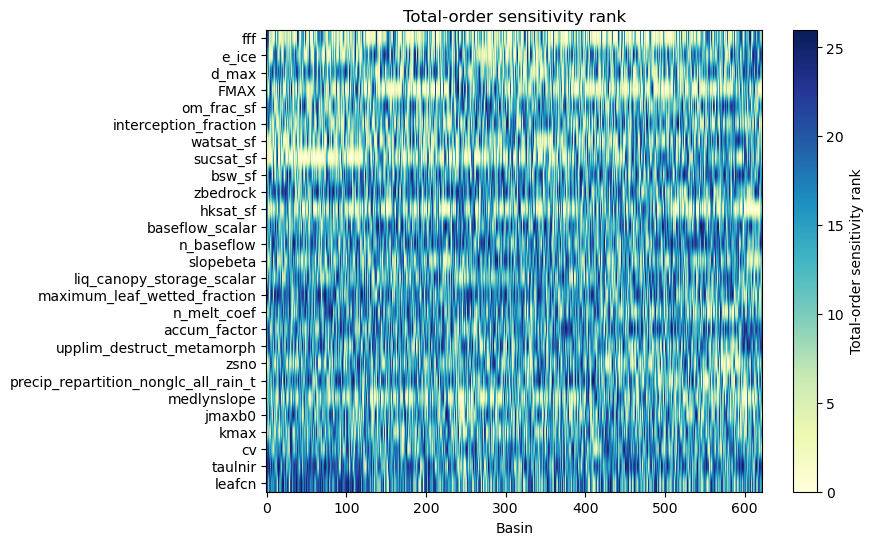

In [13]:
fig = plt.figure(figsize=[8, 6])      

plt.imshow(rank_ind_total, aspect='auto', cmap='YlGnBu')
plt.xlabel('Basin')
# plt.ylabel('Parameter')
plt.colorbar(label='Total-order sensitivity rank')
plt.title('Total-order sensitivity rank')
plt.yticks(np.arange(27), paramnames)

plt.show()

/glade/derecho/scratch/guoqiang/tmp/ipykernel_22638/941101791.py:14: RuntimeWarning: invalid value encountered in less
  rank_PPE2[i] = np.sum(rank_PPE<rank_PPE[i])


FMAX nan 0
fff 0.0 1
medlynslope 1.0 2
hksat_sf 6.0 3
sucsat_sf 7.0 4
watsat_sf 5.0 5
interception_fraction 22.0 6
d_max 4.0 7
e_ice 14.0 8
zsno 12.0 9
cv 13.0 10
kmax 10.0 11
n_melt_coef 23.0 12
jmaxb0 11.0 13
slopebeta 17.0 14
zbedrock nan 15
upplim_destruct_metamorph 19.0 16
om_frac_sf 18.0 17
liq_canopy_storage_scalar 3.0 18
precip_repartition_nonglc_all_rain_t nan 19
n_baseflow 20.0 20
bsw_sf 16.0 21
maximum_leaf_wetted_fraction 8.0 22
baseflow_scalar 2.0 23
leafcn 9.0 24
accum_factor 15.0 25
taulnir 21.0 26
7.868378812199037 fff
8.263242375601926 FMAX
8.985553772070626 sucsat_sf
9.186195826645266 hksat_sf
10.208667736757624 medlynslope
11.369181380417336 watsat_sf
11.658105939004816 e_ice
12.130016051364366 interception_fraction
12.298555377207062 zsno
12.617977528089888 d_max
12.975922953451043 slopebeta
13.08346709470305 kmax
13.18940609951846 jmaxb0
13.491171749598715 om_frac_sf
13.523274478330658 liq_canopy_storage_scalar
13.934189406099518 n_melt_coef
14.20545746388443 uppli

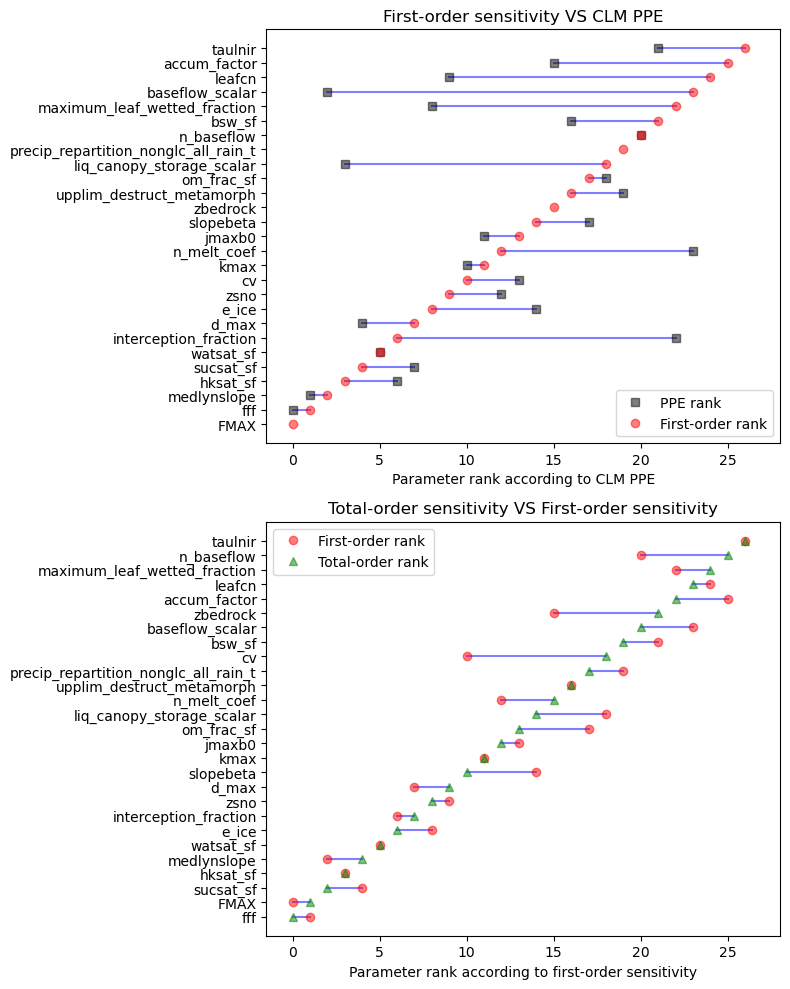

In [14]:

fig = plt.figure(figsize=[8, 10])

ax = fig.add_subplot(2, 1, 1)

rank_SAfirst = np.nanmean(rank_ind_first, axis=1)
rank_SAtotal = np.nanmean(rank_ind_total, axis=1)


rank_PPE = df_param[2].values[:-3] - 1
rank_PPE[rank_PPE < 0] = np.nan  # not used in PPE
rank_PPE2 = np.nan * np.zeros(rank_PPE.shape)
for i in range(len(rank_PPE)):
    if ~np.isnan(rank_PPE[i]):
        rank_PPE2[i] = np.sum(rank_PPE<rank_PPE[i])
rank_PPE = rank_PPE2

paramnames = df_param[3].values[:-3]

# sort according to SA results
index = np.argsort(rank_SAfirst)
rank_SAfirst = rank_SAfirst[index]
rank_SAtotal = rank_SAtotal[index]
rank_PPE = rank_PPE[index]
paramnames = paramnames[index]


# Draw lines between the points with adjusted axes
for i in range(len(paramnames)):
    plt.plot([rank_PPE[i], i], [i, i], 'b-', alpha=0.5)  # Adjusted to switch x and y
    print(paramnames[i], rank_PPE[i], i)

# Plot points with axes switched
plt.plot(rank_PPE, range(len(paramnames)), 'sk', alpha=0.5, label='PPE rank')
plt.plot(range(len(paramnames)), range(len(paramnames)), 'or', alpha=0.5, label='First-order rank')

plt.yticks(range(len(paramnames)), paramnames)  # Adjusted to set y-tick labels
plt.xlabel('Parameter rank according to CLM PPE')  # Adjusted label
plt.xlim(-1.5, 28)  # Adjusted limit
plt.title('First-order sensitivity VS CLM PPE')

plt.legend()


ax = fig.add_subplot(2, 1, 2)

rank_SAfirst = np.nanmean(rank_ind_first, axis=1)
rank_SAtotal = np.nanmean(rank_ind_total, axis=1)
rank_PPE = df_param[2].values[:-3] - 1
rank_PPE[rank_PPE < 0] = np.nan  # not used in PPE
paramnames = df_param[3].values[:-3]

# sort according to SA results
index = np.argsort(rank_SAtotal)
rank_SAfirst = rank_SAfirst[index]
rank_SAtotal = rank_SAtotal[index]
rank_PPE = rank_PPE[index]
paramnames = paramnames[index]

rank_SAfirst2 = np.nan * np.zeros(rank_SAfirst.shape)
for i in range(len(rank_SAfirst)):
    if ~np.isnan(rank_SAfirst[i]):
        rank_SAfirst2[i] = np.sum(rank_SAfirst<rank_SAfirst[i])
rank_SAfirst = rank_SAfirst2


for i, j in zip(rank_SAtotal, paramnames):
    print(i, j)

# Draw lines between the points with adjusted axes for the second subplot
for i in range(len(paramnames)):
    plt.plot([rank_SAfirst[i], i], [i, i], 'b-', alpha=0.5)  # Adjusted to switch x and y
    print(paramnames[i], rank_SAfirst[i], i)

# Plot points with axes switched for the second subplot
plt.plot(rank_SAfirst, range(len(paramnames)), 'or', alpha=0.5, label='First-order rank')
plt.plot(range(len(paramnames)), range(len(paramnames)), '^g', alpha=0.5, label='Total-order rank')

plt.yticks(range(len(paramnames)), paramnames)  # Adjusted to set y-tick labels
plt.xlabel('Parameter rank according to first-order sensitivity')  # Adjusted label
plt.xlim(-1.5, 28)  # Adjusted limit
plt.title('Total-order sensitivity VS First-order sensitivity')

plt.legend()

plt.tight_layout()
# plt.show()
# plt.savefig('Runoff_SA_rank.png', dpi=600, bbox_inches='tight', pad_inches=0)

# why a few parameters such as baseflow_scalar are not sensitive?

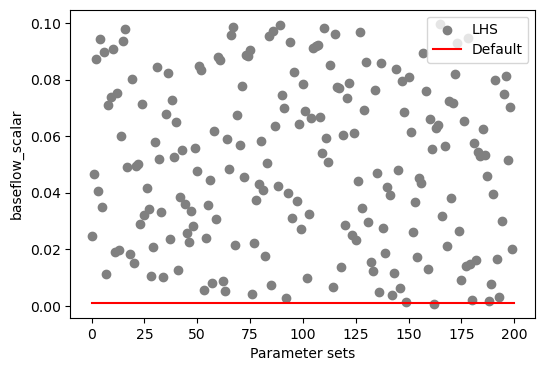

In [15]:
vn = 'baseflow_scalar'
paramnames = df_param[3].values[:-3]
ind = np.where(paramnames==vn)[0][0]
pv = params[:,ind]

fig = plt.figure(figsize=[6, 4])

plt.scatter(np.arange(200), pv[1:], color='grey', label='LHS')
plt.plot([0, 200], [pv[0], pv[0]], color='r', label='Default')
plt.ylabel(vn)
plt.xlabel('Parameter sets')
plt.legend()
plt.show()

In [16]:
rank_SAtotal = np.nanmean(rank_ind_total, axis=1)
paramnames = df_param[3].values[:-3]
np.argsort(np.argsort(rank_SAtotal)), paramnames

(array([ 0,  6,  9,  1, 13,  7,  5,  2, 19, 21,  3, 20, 25, 10, 14, 24, 15,
        22, 16,  8, 17,  4, 12, 11, 18, 26, 23]),
 array(['fff', 'e_ice', 'd_max', 'FMAX', 'om_frac_sf',
        'interception_fraction', 'watsat_sf', 'sucsat_sf', 'bsw_sf',
        'zbedrock', 'hksat_sf', 'baseflow_scalar', 'n_baseflow',
        'slopebeta', 'liq_canopy_storage_scalar',
        'maximum_leaf_wetted_fraction', 'n_melt_coef', 'accum_factor',
        'upplim_destruct_metamorph', 'zsno',
        'precip_repartition_nonglc_all_rain_t', 'medlynslope', 'jmaxb0',
        'kmax', 'cv', 'taulnir', 'leafcn'], dtype=object))

In [17]:
# Function to rank parameters according to their sensitivities
def rank_parameters(sensitivities):
    # Rank each parameter for each basin, higher values get lower ranks
    ranks = np.argsort(np.argsort(-sensitivities, axis=0), axis=0) + 1

    # Calculate the average rank over all basins for each parameter
    average_ranks = np.mean(ranks, axis=1)

    # Get indices of parameters from the most sensitive (lowest average rank) to the least sensitive
    sorted_indices = np.argsort(average_ranks)
    
    return sorted_indices

# Calling the function with the sensitivity index array
sorted_param_indices = rank_parameters(sens_indx_total)

# Print sorted indices of parameters from most to least sensitive
print("Indices of parameters from most sensitive to least sensitive:", sorted_param_indices)
paramnames = df_param[3].values[:-3]
paramnames[sorted_param_indices]

Indices of parameters from most sensitive to least sensitive: [ 0  3  7 10 21  6  1  5 19  2 13 23 22  4 14 16 18 20 24  8 11  9 17 26
 15 12 25]


array(['fff', 'FMAX', 'sucsat_sf', 'hksat_sf', 'medlynslope', 'watsat_sf',
       'e_ice', 'interception_fraction', 'zsno', 'd_max', 'slopebeta',
       'kmax', 'jmaxb0', 'om_frac_sf', 'liq_canopy_storage_scalar',
       'n_melt_coef', 'upplim_destruct_metamorph',
       'precip_repartition_nonglc_all_rain_t', 'cv', 'bsw_sf',
       'baseflow_scalar', 'zbedrock', 'accum_factor', 'leafcn',
       'maximum_leaf_wetted_fraction', 'n_baseflow', 'taulnir'],
      dtype=object)

# Spatial distribution of sensitivities

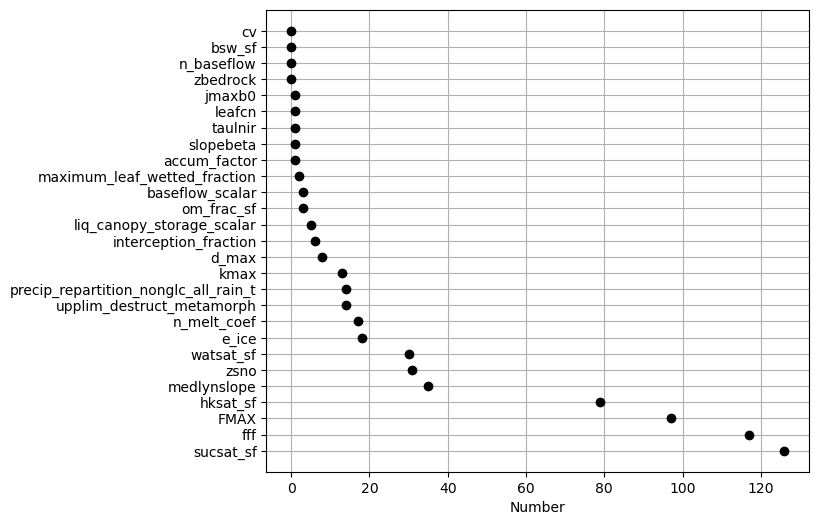

In [18]:
index = np.argmin(rank_ind_total, 0) # which parameter is the most sensitive for each basin
nparam = rank_ind_total.shape[0]
stat = np.zeros(nparam)
for i in range(nparam):
    stat[i] = np.sum(index==i)

paramnames = df_param[3].values[:-3]

inds = np.argsort(-stat)
stat = stat[inds]
paramnames = paramnames[inds]


fig = plt.figure(figsize=[7, 6])
plt.plot(stat, range(len(paramnames)), 'ok')
plt.yticks(range(len(paramnames)), paramnames)  # Set x-tick labels to paramnames
plt.grid('on')
plt.xlabel('Number')

plt.show()

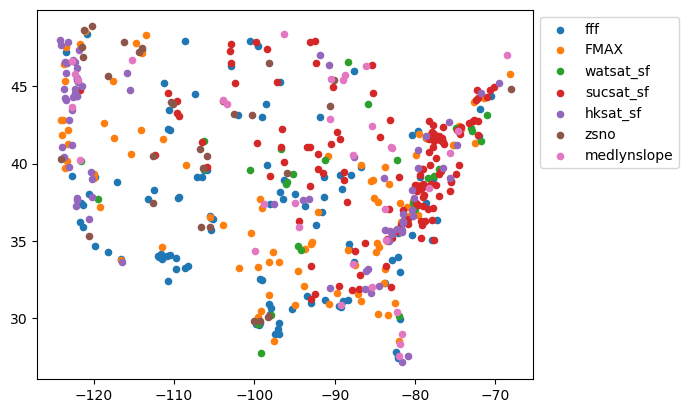

In [19]:
# For each basin, find the most sensitive parameters
# use total order rank
lat = df_info[3].values
lon = df_info[2].values

index = np.argmin(rank_ind_total, 0)
nparam = rank_ind_total.shape[0]
stat = np.zeros(nparam)
for i in range(nparam):
    stat[i] = np.sum(index==i)
paramnames = df_param[3].values[:-3]

induse = np.where(stat>=20)[0]
paramnames = paramnames[induse]

ind = np.argmin(rank_ind_total,axis=0)
for i, n in zip(induse,paramnames):
    plt.scatter(lon[ind==i], lat[ind==i], 20, label = n)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


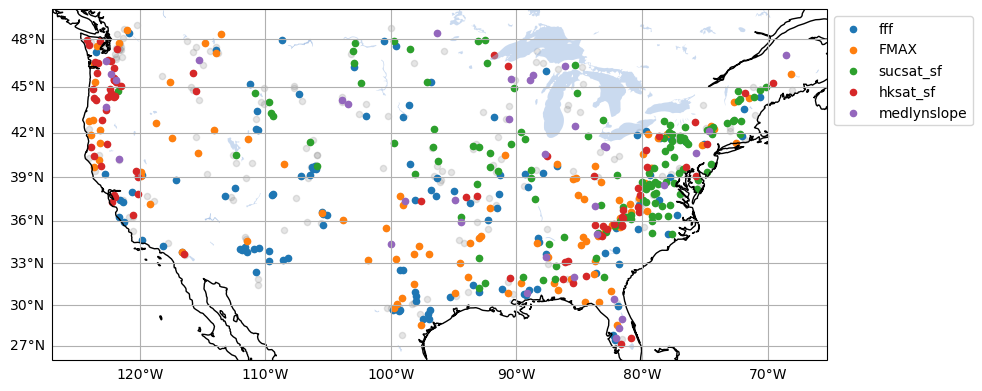

In [20]:
lat = df_info[3].values
lon = df_info[2].values

index = np.argmin(rank_ind_total, 0)
nparam = rank_ind_total.shape[0]
stat = np.zeros(nparam)
for i in range(nparam):
    stat[i] = np.sum(index==i)
paramnames = df_param[3].values[:-3]

induse = np.where(stat>=35)[0]
paramnames = paramnames[induse]

ind = np.argmin(rank_ind_total,axis=0)

# Create a new figure with a specific size
plt.figure(figsize=(10, 5))

# Create a GeoAxes in the tile's projection
ax = plt.axes(projection=ccrs.Miller())

# Add coastlines to the map
ax.coastlines()

ax.add_feature(cfeature.LAKES, alpha=0.5)  # Adds lakes, including the Great Lakes, with some transparency


ax.scatter(lon, lat, 20, color='grey',alpha=0.2, transform=ccrs.PlateCarree())
for i, n in zip(induse,paramnames):
    ax.scatter(lon[ind==i], lat[ind==i], 20, label = n,  transform=ccrs.PlateCarree())

# Add a gridliner
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.ylabels_right = False
gl.xlabels_top = False
    

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

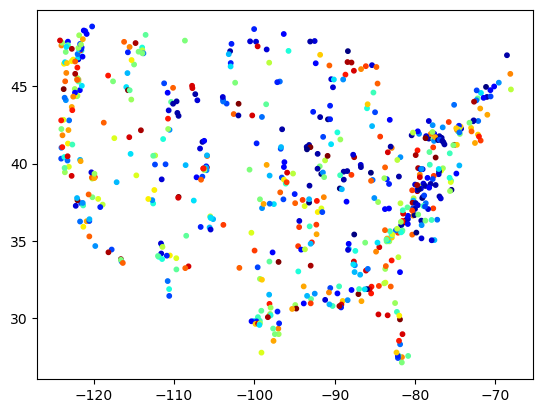

In [21]:
# For each parameter, plot its sensitivity rank in each basin
# use total order rank
lat = df_info[3].values
lon = df_info[2].values

# plt.scatter(lon, lat, 10, rank_ind_total[0,:], cmap='jet')
plt.scatter(lon, lat, 10, rank_ind_total[1,:], cmap='jet') # Why e_ice is sensitive in some florida basins? e.g., 142

In [22]:
rank_ind_total[:,142], lat[142], lon[142]

(array([ 0.,  4.,  2.,  1.,  9., 18., 12., 15.,  5., 23., 11.,  8., 26.,
        16., 13., 24.,  6., 19., 22., 25., 17.,  3., 14.,  7., 21., 20.,
        10.]),
 27.54762,
 -82.14564)

In [23]:
process_group1 = {'Infiltration': [0,1,2,3,4], 
                 'Interception': [5],
                 'Soil_storagedrainage': [6,7,8,9,10],
                 'Baseflow': [11, 12],
                 'SurfaceWater': [13],
                 'Canopy_water': [14, 15],
                 'Snow': [16, 17, 18, 19, 20],
                 'StomatalPhoto': [21, 22, 23],
                 'SensibleLatent': [24, 25],
                 'Biogeochemistry': [26]
                }
process_group2 = {'Infiltration': [0,1,2,3,4,6,7,8,9,10], 
                 'Baseflow': [11, 12],
                 'SurfaceWater': [13],
                 'Canopy_water': [5, 14, 15],
                 'Snow': [16, 17, 18, 19, 20],
                 'StomatalPhoto': [21, 22, 23],
                 'SensibleLatent': [24, 25],
                 'Biogeochemistry': [26]
                }


items = list(process_group2.items())

processrank = np.nan * np.zeros([len(items), rank_ind_total.shape[1]])
for b in range(rank_ind_total.shape[1]):
    rb = rank_ind_total[:, b]
    for i in range(len(items)):
        key, value = items[i]
        indi = [j for j in range(len(rb)) if rb[j] in value]
        processrank[i, b] = np.nanmean(indi)

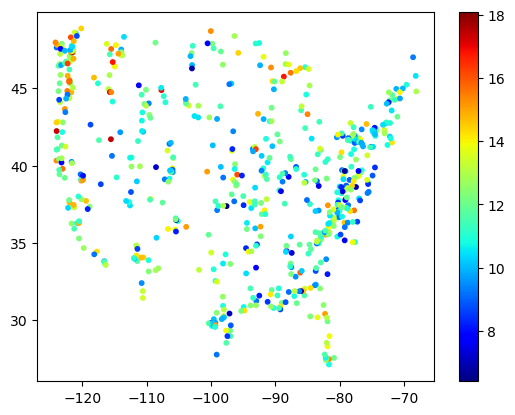

In [24]:
plt.scatter(lon, lat, 10, processrank[0], cmap='jet')
plt.colorbar()

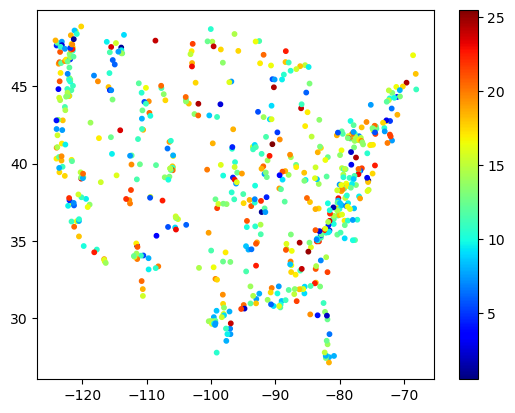

In [25]:
plt.scatter(lon, lat, 10, processrank[1], cmap='jet')
plt.colorbar()

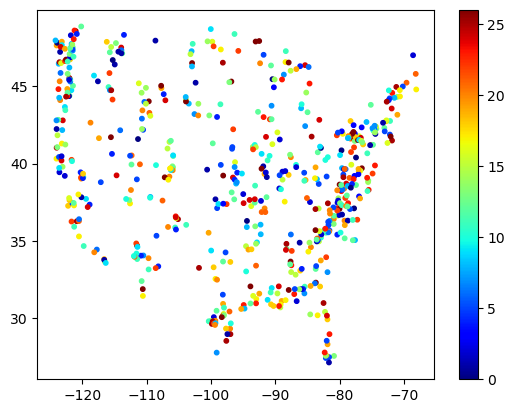

In [26]:
plt.scatter(lon, lat, 10, processrank[2], cmap='jet')
plt.colorbar()

# Check a few parameters

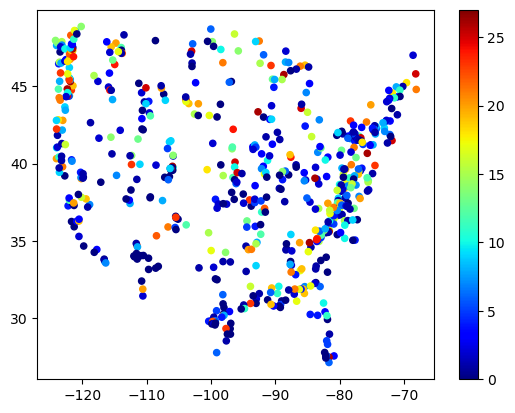

In [27]:
ind = np.where(df_param[3].values[:-3]=='fff')[0][0]
plt.scatter(lon, lat, 20, rank_ind_total[ind, :], cmap='jet', vmin=0, vmax=27)
plt.colorbar()
plt.show()

/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .t

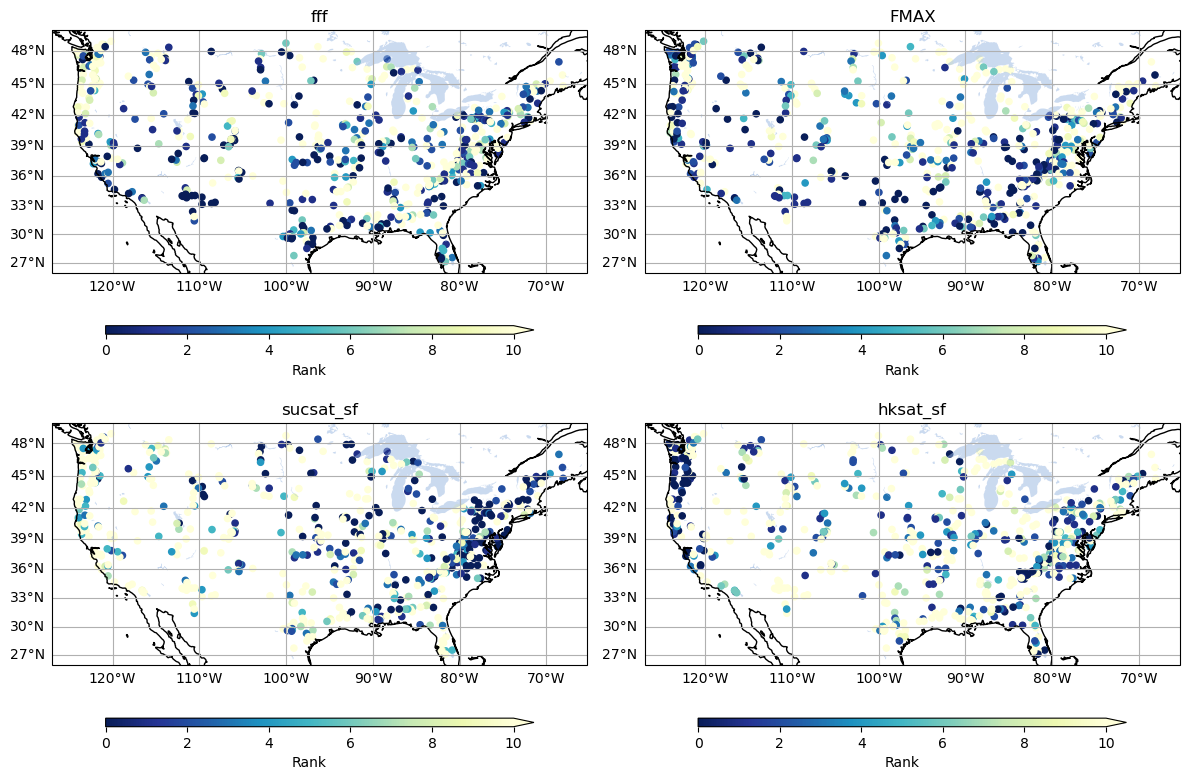

In [28]:


font = {'size'   : 10}

matplotlib.rc('font', **font)

# Create a new figure with a specific size
fig = plt.figure(figsize=(12, 8))


flag = 1
for v in ['fff','FMAX','sucsat_sf','hksat_sf']:

    ax = fig.add_subplot(2,2,flag, projection=ccrs.Miller())
    ax.coastlines()
    ax.add_feature(cfeature.LAKES, alpha=0.5)  # Adds lakes, including the Great Lakes, with some transparency
    ind = np.where(df_param[3].values[:-3]==v)[0][0]
    p = ax.scatter(lon, lat, 20, rank_ind_total[ind, :], cmap='YlGnBu_r', vmin=0, vmax=10, transform=ccrs.PlateCarree())
    plt.colorbar(p, ax=ax, orientation='horizontal', aspect=50, shrink=0.8, label="Rank", extend='max')
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.ylabels_right = False
    gl.xlabels_top = False
    
    ax.set_title(v)
    
    flag = flag + 1


plt.tight_layout()
plt.show()


# Build a machine learning model

In [32]:
# df_info.iloc[[135]] # Florida
lat[135], lon[135]

(28.94932, -81.56596)

In [33]:
kgemedian = np.nanmedian(kge, axis=1)
# kgemedian = kge[:, np.argmin(lat)]
kgemedian = kge[:, 135]

induse = ~np.isnan(kgemedian)

kgemedian = kgemedian[induse]
paramsuse = params[induse, :]

/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming kgemedian and paramsuse are numpy arrays with the shapes mentioned
# kgemedian.shape == (180,)
# paramsuse.shape == (180, 27)

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(paramsuse, kgemedian, test_size=0.2, random_state=42)

# Step 2: Train the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.1146219060857423


In [36]:
lowerlim = df_param[5].values[:-3]
upperlim = df_param[6].values[:-3]

In [37]:
# d1 = X_test[0][np.newaxis,:]
# d2 = d1.copy()
# d2[0,1] = 1 # e_ice
# d3 = d1.copy()
# d3[0,1] = 7

d1 = X_test[0][np.newaxis,:]
d2 = d1.copy()
d2[0,0] = 0.05
d3 = d1.copy()
d3[0,0] = 4

rf.predict(d1), rf.predict(d2), rf.predict(d3), 

(array([-0.06452162]), array([-0.98352006]), array([-0.06818157]))

In [38]:
df_param

,0,1,2,3,4,5,6,7,8,9
0,Hydrology,Infiltration\nSoil storage,1,fff,0.5,0.02,5.0,Same,Param,None
1,Hydrology,Infiltration,23,e_ice,6.0,0.1,8.0,Low0to0.1,Param,None
2,Hydrology,Infiltration,7,d_max,15.0,10.0,60.0,Same,Param,None
3,Hydrology,Infiltration,0,FMAX,0.381669,0.1,0.9,NotInPPE,Surfdata,None
4,Hydrology,Infiltration\nGroundwater flow,31,om_frac_sf,1.0,0.8,1.2,Same,Param,None
5,Hydrology,Canopy Interception,45,interception_fraction,1.0,0.1,1.0,Low0.5to0.1,Namelist,None
6,Hydrology,Soil storage capacity,9,watsat_sf,1.0,0.8,1.2,Same,Param,None
7,Hydrology,Soil storage capacity,11,sucsat_sf,1.0,0.1,10.0,Same,Param,None
8,Hydrology,Soil storage capacity,27,bsw_sf,1.0,0.8,1.2,Same,Param,None
9,Hydrology,Soil storage capacity,0,zbedrock,10.639669,8.512,12.768,Same,Surfdata,None


In [39]:
sens_indx_total[:,135]

array([0.42603188, 0.31252648, 0.3304258 , 0.31705537, 0.34987348,
       0.4002559 , 0.36089815, 0.3229662 , 0.29530261, 0.32845859,
       0.32521608, 0.33247004, 0.33927166, 0.32169985, 0.39719266,
       0.33653349, 0.31288207, 0.31938726, 0.31101984, 0.32444113,
       0.33247356, 0.46561582, 0.3908637 , 0.32907909, 0.32644687,
       0.32746499, 0.33258453])

In [40]:
rank_ind_total[:,135]

array([ 1., 24., 12., 22.,  6.,  2.,  5., 19., 26., 14., 17., 11.,  7.,
       20.,  3.,  8., 23., 21., 25., 18., 10.,  0.,  4., 13., 16., 15.,
        9.])